# Part A

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [27]:
df1=pd.DataFrame(pd.read_csv('TelcomCustomer-Churn_1.csv'))
df2=pd.DataFrame(pd.read_csv('TelcomCustomer-Churn_2.csv'))

In [28]:
merged_data=pd.merge(df1,df2,how='inner',on='customerID')
merged_data.to_csv('merged.csv')

In [29]:
columns=merged_data.columns.values.tolist()
col1=df1.columns.values.tolist()
col2=df2.columns.values.tolist()
col2.pop(0)
total_columns=col1+col2

In [30]:
print(columns)

['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [31]:
print(total_columns)

['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [32]:
if total_columns==columns:
    print('The merged dataframe has all the columns')
else:
    print('Some columns are missing')

The merged dataframe has all the columns


In [33]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [34]:
merged_data['TotalCharges'] = pd.to_numeric(merged_data['TotalCharges'], errors='coerce')
merged_data['SeniorCitizen']=merged_data['SeniorCitizen'].replace(0,'No')
merged_data['SeniorCitizen']=merged_data['SeniorCitizen'].replace(1,'Yes')
merged_data.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


In [35]:
merged_data['TotalCharges'].fillna(merged_data.TotalCharges.mean(), inplace = True)

In [36]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


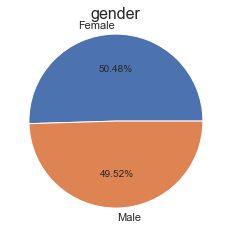

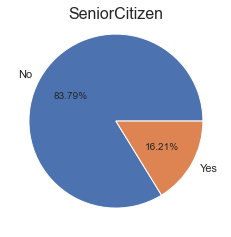

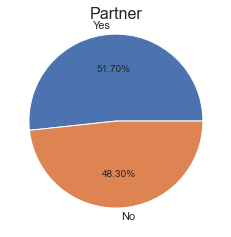

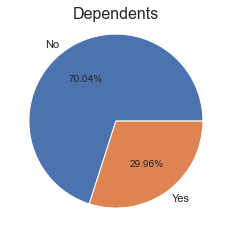

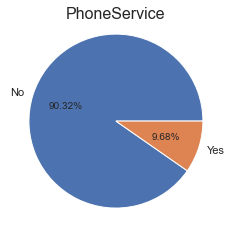

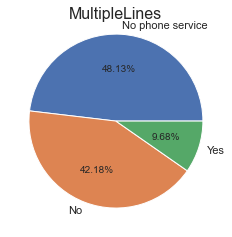

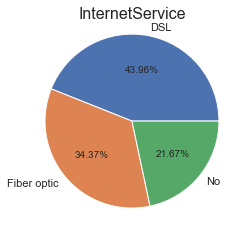

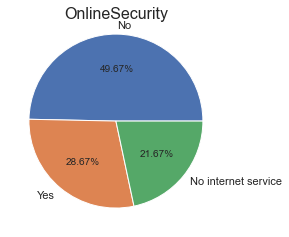

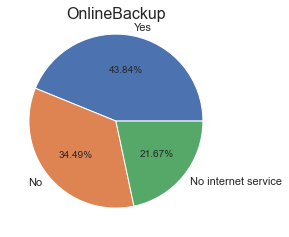

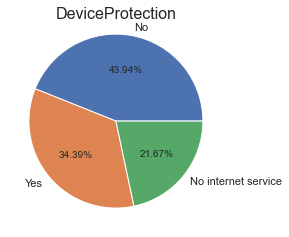

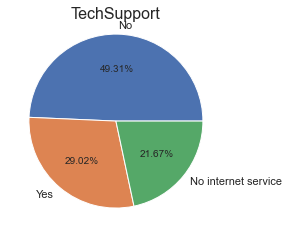

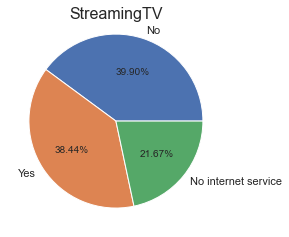

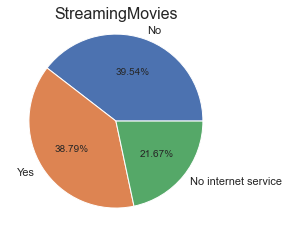

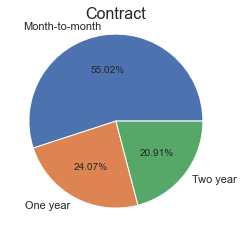

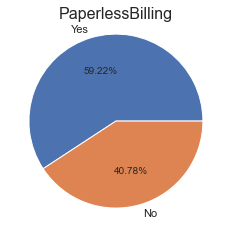

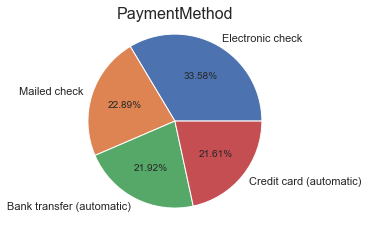

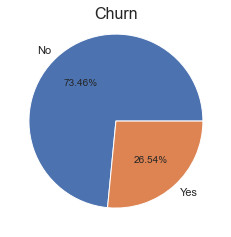

In [37]:
def pie_charts_categorical(y):
    x=list(y.select_dtypes(include=['object']))
    data=pd.DataFrame(y[x])
    for i in range(0,len(x)):
        if len(data.iloc[:,i].unique())!=data.shape[0]:
            labelz=data.iloc[:,i].unique()
            fig,ax=plt.subplots()
            plt.pie(x=data.iloc[:,i].value_counts(),labels=labelz,radius=1,autopct='%0.2f%%');
            plt.title(x[i],fontdict={'fontsize':16, 'verticalalignment':'top'},loc='center')
        i+=1
pie_charts_categorical(merged_data)

The proportion of males is almost equal to females. 

Very few number of customers were senior citizens. 

The proportion of those who had a partner was almost equal to those who did not have a partner. 

The proportion of customers who had dependents were lesser than half of those who did not have dependents. 

Only one-tenth of the customers opted for phone service. 

Similarly, only one-tenth of the customers opted for multiple lines, half of the remaining customers were having no phone service and the remaining opted for a single line. 

Internet service was not provided to one-fifth of the customers and almost equal number of those who were provided internet service opted for DSL and Fiber optic. 

Half of the customers did not opt for online security, almost one-third of the customers opted for it and the remaining customers had no internet service. It is understood that a majority of the customers who had internet service were not interested in online security. 

Almost equal number of customers who had internet service wanted and did not want online backup. 

The exact trend observed with online backup was observed with device protection also. 

A vast majority of customers who had internet service did not opt for tech support with a differnce of 20% of customers between the groups which opted and did not opt. 

In case of both streaming TV and streaming movies the percentage of customers who opted and did not opt for the services was exactly the same. 

More than half of the customers were interested in month to month contract and almost similar number of customers chose one year and two year contracts. 

More than half of the customers chose to opt for paperless billing. 

The payment method chosen by the majority of the customers was electronic check and similar number of customers chose to pay through the other three payment mehtods. 

One-fourth of the customers churned.     

In [38]:
for feature in merged_data.columns: 
    if merged_data[feature].dtype == 'object':
        merged_data[feature] = pd.Categorical(merged_data[feature])

In [39]:
structure={'Churn':{'No':0,'Yes':1},'gender':{'Male':0,'Female':1},'SeniorCitizen':{'No':0,'Yes':1},
           'Dependents':{'No':0,'Yes':1},'Partner':{'No':0,'Yes':1},'PhoneService':{'No':0,'Yes':1},
           'PaperlessBilling':{'No':0,'Yes':1}}
onehot=['PaymentMethod','Contract','StreamingMovies','StreamingTV','TechSupport','DeviceProtection',
        'OnlineBackup','OnlineSecurity','InternetService','MultipleLines']
merged_data=merged_data.replace(structure)
merged_data=pd.get_dummies(merged_data, columns=onehot)

In [40]:
merged_data.head(40)
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 42 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   customerID                               7043 non-null   category
 1   gender                                   7043 non-null   int64   
 2   SeniorCitizen                            7043 non-null   int64   
 3   Partner                                  7043 non-null   int64   
 4   Dependents                               7043 non-null   int64   
 5   tenure                                   7043 non-null   int64   
 6   PhoneService                             7043 non-null   int64   
 7   PaperlessBilling                         7043 non-null   int64   
 8   MonthlyCharges                           7043 non-null   float64 
 9   TotalCharges                             7043 non-null   float64 
 10  Churn                               

In [41]:
X=merged_data.drop(labels=['customerID','MultipleLines_Yes','OnlineSecurity_No internet service','OnlineBackup_No internet service',
                   'DeviceProtection_No internet service','TechSupport_No internet service','StreamingTV_No internet service',
                   'StreamingMovies_No internet service','Churn'], axis=1)
y=merged_data.pop('Churn')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=27)

In [42]:
X_train.apply(zscore)
X_test.apply(zscore)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,PaymentMethod_Bank transfer (automatic),...,DeviceProtection_Yes,OnlineBackup_No,OnlineBackup_Yes,OnlineSecurity_No,OnlineSecurity_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_No phone service
4903,1.010703,-0.446261,-0.968557,-0.652774,-1.136781,0.31338,0.832772,0.832652,-0.822115,-0.521211,...,-0.738211,-0.890293,1.363089,1.017903,-0.656092,-0.729055,1.116785,-0.512391,-0.954885,-0.31338
2695,-0.989410,-0.446261,1.032464,-0.652774,0.766804,0.31338,0.832772,0.520185,0.870880,-0.521211,...,1.354625,-0.890293,1.363089,-0.982412,1.524176,1.371638,-0.895427,-0.512391,-0.954885,-0.31338
2184,1.010703,2.240841,-0.968557,-0.652774,-1.258287,0.31338,0.832772,0.757860,-0.942067,-0.521211,...,1.354625,1.123226,-0.733628,1.017903,-0.656092,-0.729055,1.116785,-0.512391,-0.954885,-0.31338
6024,1.010703,-0.446261,1.032464,-0.652774,-1.217785,0.31338,0.832772,0.855921,-0.914408,-0.521211,...,-0.738211,-0.890293,1.363089,1.017903,-0.656092,-0.729055,1.116785,-0.512391,-0.954885,-0.31338
5861,-0.989410,-0.446261,-0.968557,-0.652774,0.078273,0.31338,-1.200809,-1.545753,-0.725544,-0.521211,...,-0.738211,-0.890293,-0.733628,-0.982412,-0.656092,-0.729055,-0.895427,1.951634,1.047247,-0.31338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5906,1.010703,2.240841,-0.968557,-0.652774,-0.772265,0.31338,0.832772,0.438745,-0.541458,-0.521211,...,-0.738211,-0.890293,1.363089,1.017903,-0.656092,-0.729055,1.116785,-0.512391,-0.954885,-0.31338
949,-0.989410,-0.446261,1.032464,1.531925,0.078273,0.31338,-1.200809,-1.504202,-0.690177,1.918610,...,-0.738211,-0.890293,-0.733628,-0.982412,-0.656092,-0.729055,-0.895427,1.951634,1.047247,-0.31338
4426,1.010703,-0.446261,-0.968557,1.531925,-0.691262,0.31338,0.832772,0.457027,-0.470962,-0.521211,...,-0.738211,1.123226,-0.733628,1.017903,-0.656092,-0.729055,1.116785,-0.512391,-0.954885,-0.31338
5912,1.010703,2.240841,-0.968557,-0.652774,0.564295,0.31338,0.832772,0.646502,0.703662,1.918610,...,1.354625,-0.890293,1.363089,1.017903,-0.656092,-0.729055,1.116785,-0.512391,-0.954885,-0.31338


In [43]:
model=XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

In [54]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

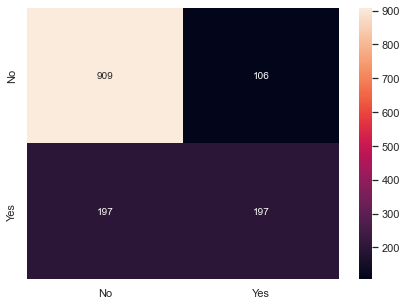

In [60]:
#Evaluation metrics for test data
preds = model.predict(X_test)

cm=confusion_matrix(y_test,preds,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g');

In [56]:
print("Precision = {}".format(precision_score(y_test,preds, average='macro')))
print("Recall = {}".format(recall_score(y_test,preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test,preds)))

Precision = 0.7360228337481126
Recall = 0.6977832512315271
Accuracy = 0.7849538679914834


In [57]:
report_test=metrics.classification_report(y_test,preds,target_names=('No','Yes'))
print(report_test)

              precision    recall  f1-score   support

          No       0.82      0.90      0.86      1015
         Yes       0.65      0.50      0.57       394

    accuracy                           0.78      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.77      0.78      0.78      1409



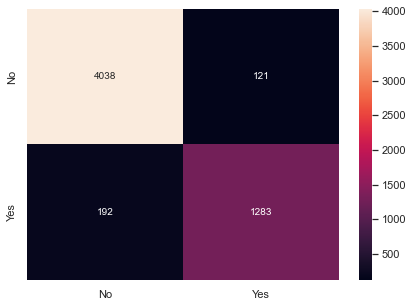

In [62]:
#Evaluation metrics for trained data
train_preds = model.predict(X_train)

cm_trn=confusion_matrix(y_train,train_preds,labels=[0, 1])

df_cm_trn = pd.DataFrame(cm_trn, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_trn, annot=True ,fmt='g');

In [63]:
print("Precision = {}".format(precision_score(y_train,train_preds, average='macro')))
print("Recall = {}".format(recall_score(y_train,train_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_train,train_preds)))

Precision = 0.934213796447839
Recall = 0.920368488187757
Accuracy = 0.9444444444444444


In [64]:
report_trn=metrics.classification_report(y_train,train_preds,target_names=('No','Yes'))
print(report_trn)

              precision    recall  f1-score   support

          No       0.95      0.97      0.96      4159
         Yes       0.91      0.87      0.89      1475

    accuracy                           0.94      5634
   macro avg       0.93      0.92      0.93      5634
weighted avg       0.94      0.94      0.94      5634



In [68]:
params = { 'max_depth': [6,7,8],
           'learning_rate': [0.01, 0.05, 0.1, 0.2],
           'n_estimators': [100,130,150],
           'objective':['binary:logistic','binary:hinge'],
          'gamma':[0,1,2],
          'lambda':[0,1,2],
          'min_child_weight':[0,1,2]
         }
tuned_model=XGBClassifier(use_label_encoder=False, eval_metric='mlogloss',random_state=5)
clf = GridSearchCV(estimator=tuned_model, 
                   param_grid=params,
                   scoring='recall', 
                   verbose=1)
clf.fit(X_train,y_train)

Fitting 5 folds for each of 1944 candidates, totalling 9720 fits


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone...
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     use_label_encoder=False,
                                     validate_para

In [85]:
print("Best parameters:", clf.best_params_)

Best parameters: {'gamma': 2, 'lambda': 2, 'learning_rate': 0.01, 'max_depth': 6, 'min_child_weight': 2, 'n_estimators': 100, 'objective': 'binary:hinge'}


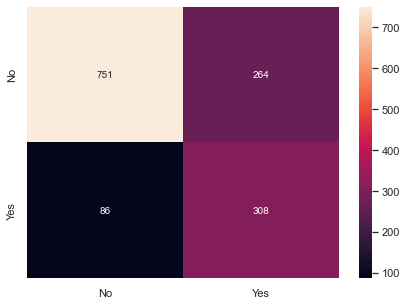

In [80]:
#Evaluation metrics for test data after hyperparameter tuning
best_model=XGBClassifier(use_label_encoder=False, eval_metric='mlogloss',gamma= 2, 
                         reg_lambda= 2, learning_rate= 0.01, max_depth= 6, min_child_weight= 2, n_estimators= 100,
                         objective= 'binary:hinge',random_state=5)
best_model.fit(X_train,y_train)
tuned_preds = best_model.predict(X_test)

tuned_cm=confusion_matrix(y_test,tuned_preds,labels=[0, 1])

dft_cm = pd.DataFrame(tuned_cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(dft_cm, annot=True ,fmt='g');

In [81]:
print("Precision = {}".format(precision_score(y_test,tuned_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test,tuned_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test,tuned_preds)))

Precision = 0.7178568146310081
Recall = 0.7608136830786927
Accuracy = 0.751596877217885


In [83]:
report_tuned=metrics.classification_report(y_test,tuned_preds,target_names=('No','Yes'))
print(report_tuned)

              precision    recall  f1-score   support

          No       0.90      0.74      0.81      1015
         Yes       0.54      0.78      0.64       394

    accuracy                           0.75      1409
   macro avg       0.72      0.76      0.72      1409
weighted avg       0.80      0.75      0.76      1409



              precision    recall  f1-score   support

          No       0.92      0.73      0.81      4159
         Yes       0.52      0.83      0.64      1475

    accuracy                           0.75      5634
   macro avg       0.72      0.78      0.73      5634
weighted avg       0.82      0.75      0.77      5634



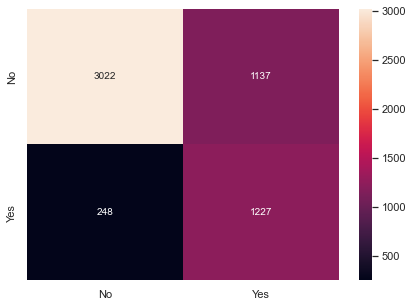

In [84]:
#Evaluation metrics for trained data after hyperparameter tuning
tuned_preds_trn = best_model.predict(X_train)

tuned_cm_trn=confusion_matrix(y_train,tuned_preds_trn,labels=[0, 1])

dftt_cm = pd.DataFrame(tuned_cm_trn, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(dftt_cm, annot=True ,fmt='g');
report_tuned_trn=metrics.classification_report(y_train,tuned_preds_trn,target_names=('No','Yes'))
print(report_tuned_trn)

In [86]:
print("Precision = {}".format(precision_score(y_train,tuned_preds_trn, average='macro')))
print("Recall = {}".format(recall_score(y_train,tuned_preds_trn, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_train,tuned_preds_trn)))

Precision = 0.7215972772008259
Recall = 0.7792406910070462
Accuracy = 0.7541711040113596


# Part B

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import pickle

def function_main(data_file):#Takes a .csv file as input and returns a saved base model
    def read_csv(d):#Reads a given .csv file and outputs it as a dataframe
        df=pd.DataFrame(pd.read_csv(d))
        return df
    dfm=read_csv(data_file)

    def pre_processing(dataframe):#Performs preprocessing on the given dataframe and returns it 
        def confirm_datatypes(dataframe):#To check the datatypes of each column and to change the datatype if necessary
            obj=list(dataframe.select_dtypes(include=['object']))
            inte=list(dataframe.select_dtypes(include=['int']))
            for i in obj[:]:
                answer=input(f'Does {i} column really belong to an Object datatype? Yes or No: ')
                if answer == 'No':
                    true_dtype=input('What should be the datatype of the column: ')
                    if true_dtype=='float':
                        dataframe[i] = pd.to_numeric(dataframe[i], errors='coerce')
                        confirmed_data = dataframe
            return confirmed_data
        data_1=confirm_datatypes(dataframe)
        def impute_missing(data_1):#Imputation of null values
            flt=list(data_1.select_dtypes(include=['float']))
            for i in flt[:]:
                if data_1[i].isna().any()==True:
                    data_1[i].fillna(data_1[i].mean(), inplace = True)
            imputed_data=data_1
            return imputed_data
        data_2=impute_missing(data_1)
        def convert_data(data_2):#Conversion of the data into a machine understandable format
            for f in data_2.columns: 
                if data_2[f].dtype == 'object':
                    data_2[f] = pd.Categorical(data_2[f])
            structure_={'Churn':{'No':0,'Yes':1},'gender':{'Male':0,'Female':1},'SeniorCitizen':{'No':0,'Yes':1},
           'Dependents':{'No':0,'Yes':1},'Partner':{'No':0,'Yes':1},'PhoneService':{'No':0,'Yes':1},
           'PaperlessBilling':{'No':0,'Yes':1}}
            onehotcols=['PaymentMethod','Contract','StreamingMovies','StreamingTV','TechSupport','DeviceProtection',
            'OnlineBackup','OnlineSecurity','InternetService','MultipleLines']
            data_2=data_2.replace(structure_)
            data_2=pd.get_dummies(data_2, columns=onehotcols)
            converted_data=data_2
            return converted_data
        data_3=convert_data(data_2)
        return data_3    
    data_4=pre_processing(dfm)

    X=data_4.drop(labels=['customerID','MultipleLines_Yes','OnlineSecurity_No internet service','OnlineBackup_No internet service',
                   'DeviceProtection_No internet service','TechSupport_No internet service','StreamingTV_No internet service',
                   'StreamingMovies_No internet service','Churn'], axis=1)
    y=data_4.pop('Churn')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=27)
    X_train.apply(zscore)
    X_test.apply(zscore)
    models={'KNN':KNeighborsClassifier(n_neighbors=3,weights='distance'),
           'SVM':svm.SVC(gamma=0.05, C=5),
           'Naive Bayes':GaussianNB(),
           'Logistic Regression':LogisticRegression(solver="liblinear")}
    def train(mod,X_tr, X_t, y_tr, y_t):#Trains various models and returns a dataframe showing the model performances
        model_list=['KNN','SVM','Naive Bayes','Logistic Regression']
        train_acc_list=[]
        test_acc_list=[]
        for model_sl in mod:
            m=mod[model_sl]
            m.fit(X_tr,y_tr)
            preds_train=m.predict(X_tr)
            preds_test=m.predict(X_t)
            train_acc=(accuracy_score(y_tr,preds_train))
            test_acc=(accuracy_score(y_t,preds_test))
            train_acc_list.append(train_acc)
            test_acc_list.append(test_acc)
        results=pd.DataFrame({'Model Name':model_list,'Train Accuracy':train_acc_list,'Test Accuracy':test_acc_list})
        return results
                
        
    results_df=train(models,X_train, X_test, y_train, y_test)

    def select_save(final,models_dict,train_X,train_y):#Selects the best base model after training and returns it
        final = final.assign(Difference=final['Train Accuracy'] - final['Test Accuracy'])
        final_df=final.sort_values(ascending=True,by='Difference')
        best_model=final_df['Model Name'][0]
        best=models_dict[best_model]
        best.fit(train_X,train_y)
        return best

    filename='best_base_model.sav'
    the_model=select_save(results_df,models,X_train,y_train)
    pickle.dump(the_model,open(filename,'wb'))    
    return filename

function_main('merged.csv')
            
    
                
       
    
        

Does customerID column really belong to an Object datatype? Yes or No: Yes
Does gender column really belong to an Object datatype? Yes or No: Yes
Does Partner column really belong to an Object datatype? Yes or No: Yes
Does Dependents column really belong to an Object datatype? Yes or No: Yes
Does PhoneService column really belong to an Object datatype? Yes or No: Yes
Does MultipleLines column really belong to an Object datatype? Yes or No: Yes
Does InternetService column really belong to an Object datatype? Yes or No: Yes
Does OnlineSecurity column really belong to an Object datatype? Yes or No: Yes
Does OnlineBackup column really belong to an Object datatype? Yes or No: Yes
Does DeviceProtection column really belong to an Object datatype? Yes or No: Yes
Does TechSupport column really belong to an Object datatype? Yes or No: Yes
Does StreamingTV column really belong to an Object datatype? Yes or No: Yes
Does StreamingMovies column really belong to an Object datatype? Yes or No: Yes
Doe

'best_base_model.sav'